# II. Garbage image data CNN modelling
## 202STG01 고유정

# 1. 자료 내려받기

In [9]:
import numpy as np
import cv2
import keras as K
#from keras.callbacks import ModelCheckpoint
#from keras.models import Sequential

import random,os,glob
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications.densenet import preprocess_input, DenseNet121
from keras.optimizers import SGD, Adagrad
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPool1D, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers


Using TensorFlow backend.


In [10]:
dir_path = 'C:/Users/yjk9/Desktop/garbage_data/Garbage classification/garbage classification'

In [11]:
img_list = glob.glob(os.path.join(dir_path, '*/*.jpg'))

In [12]:
len(img_list)

2527

# 2. 데이터 전처리

In [13]:
train=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)
test=ImageDataGenerator(rescale=1/255,validation_split=0.1)
train_generator=train.flow_from_directory(dir_path,target_size=(300,300),batch_size=32,
                                          class_mode='categorical',subset='training')
test_generator=test.flow_from_directory(dir_path,target_size=(300,300),batch_size=32,
                                        class_mode='categorical',subset='validation')
labels = (train_generator.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [14]:
tf.executing_eagerly()

True

In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [52]:
pip install pyjwt

Note: you may need to restart the kernel to use updated packages.


# 3. 소형 합성망 구축

In [16]:
model=Sequential()
    
model.add(Conv2D(32,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='softmax'))

filepath="trained_model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0

# 4. 훈련을 위한 모델 구성하기

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# 5. 모델 적합시키기

In [33]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(32, 300, 300, 3)
(32, 6)


In [19]:
# Train Model
history = model.fit_generator(train_generator, epochs=20, steps_per_epoch=2276//32,validation_data=test_generator,
                    validation_steps=251//32,callbacks=callbacks_list)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
71/71 [==============================] - ETA: 0s - batch: 35.0000 - size: 31.6056 - loss: 1.7241 - acc: 0.2816WARNING:tensorflow:From C:\Users\yjk9\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.

Epoch 00001: val_acc improved from -inf to 0.32143, saving model to trained_model.h5
71/71 [==============================] - 211s 3s/step - batch: 35.0000 - size: 31.6056 - loss: 1.7241 - acc: 0.2816 - val_loss: 1.6077 - val_acc: 0.3214
Epoch 2/20
71/71 [==============================] - ETA: 0s - batch: 35.0000 - size: 31.6056 - loss: 1.4174 - acc: 0.4055
Epoch 00002: val_acc improved from 0.32143 to 0.40625, saving model to trained_model.

# 6. 훈련 마친 후 모델 저장

In [20]:
model.save("garbage_1.h5")

# 7. 훈련 중 손실 및 정확도

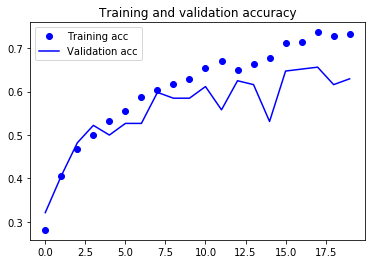

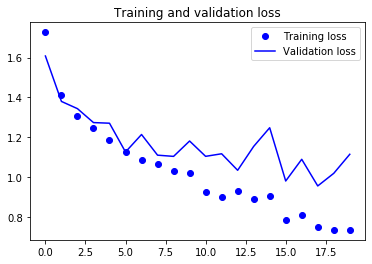

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# 8. 데이터 보강 

In [11]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models

# dropout 이용해서 돌림

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
71/71 [==============================] - ETA: 0s - batch: 35.0000 - size: 31.6056 - loss: 1.6502 - acc: 0.3079WARNING:tensorflow:From C:\Users\yjk9\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.

Epoch 00001: val_acc improved from -inf to 0.34821, saving model to trained_model.h5
71/71 [==============================] - 142s 2s/step - batch: 35.0000 - size: 31.6056 - loss: 1.6502 - acc: 0.3079 - val_loss: 1.4902 - val_acc: 0.3482
Epoch 2/20
71/71 [==============================] - ETA: 0s - batch: 35.0000 - size: 31.6056 - loss: 1.3880 - acc: 0.4407
Ep

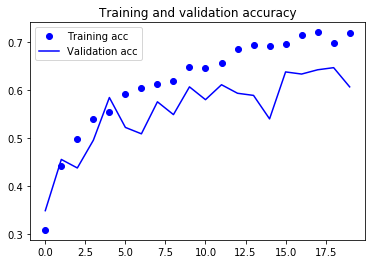

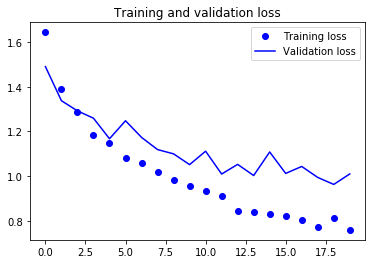

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(layers.MaxPooling2D(2, 2)) 
model.add(layers.Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(2, 2)) 
model.add(layers.Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(2, 2)) 
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train.flow_from_directory(
    dir_path,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = test.flow_from_directory(
    dir_path,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=2276//32,
    epochs=20,
    validation_data=test_generator,
    validation_steps=251//32,
    callbacks=callbacks_list)

model.save("garbage_2.h5")

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 사전훈련합성망 사용하기

In [13]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top=False,
                 input_shape=(300, 300, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

# - 동결했던 계층의 동결 해제

In [14]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1' :
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False    

    

In [22]:
from tensorflow.keras.models import load_model
model = load_model('garbage_1.h5')
model.summary() 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        18464     
__________________

# 9. 합성망이 학습한 내용 시각화

In [35]:
img_path = 'C:/Users/yjk9/Desktop/garbage_data/Garbage classification/garbage classification/paper/paper380.jpg'

(1, 300, 300, 3)


<function matplotlib.pyplot.show(*args, **kw)>

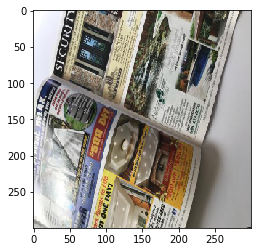

In [37]:
from keras.models import load_model
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_json
import json
import re
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img


img = image.load_img(img_path, target_size=(300, 300))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor /= 255.

print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show

In [39]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

In [40]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 300, 300, 32)


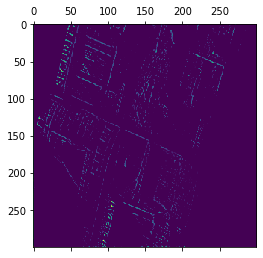

In [41]:
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.show()

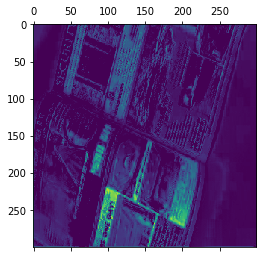

In [42]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

C:\Users\yjk9\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


MemoryError: Unable to allocate 612. TiB for an array with shape (119946304, 700928) and data type float64

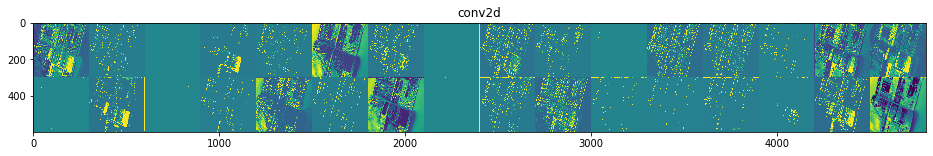

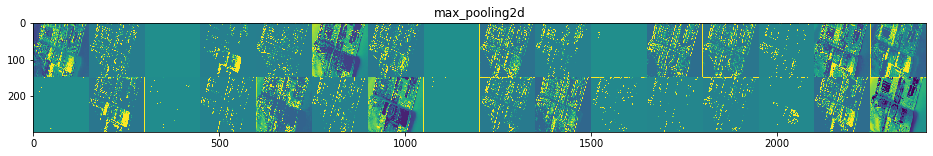

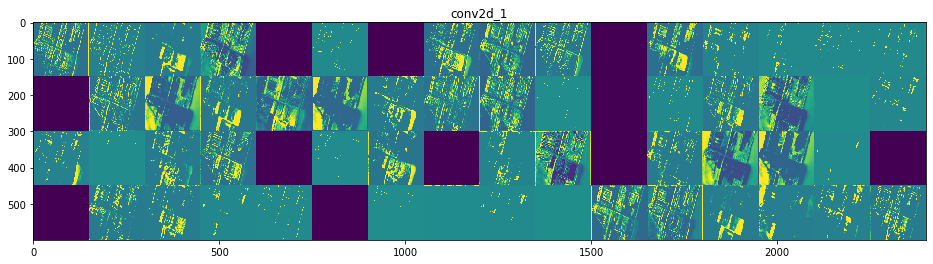

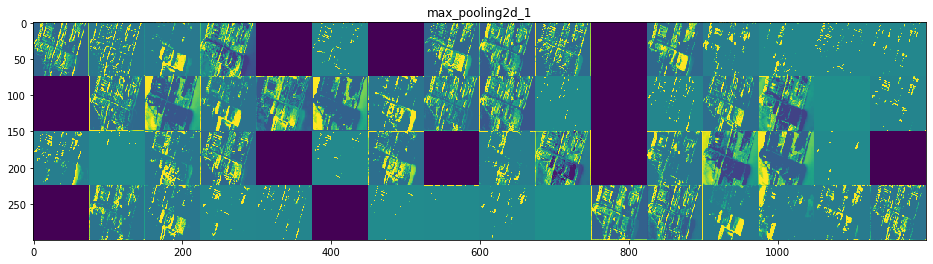

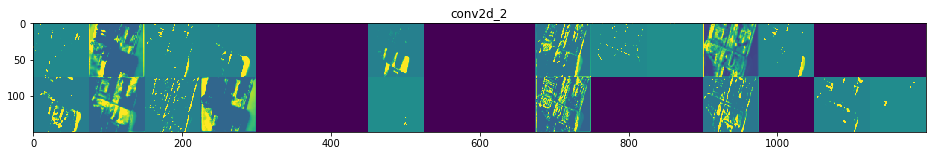

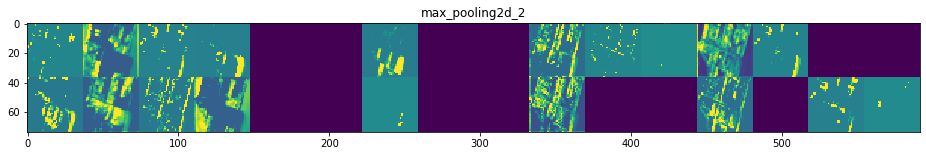

In [43]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# 특성 맵
for layer_name, layer_activation in zip(layer_names, activations):
    # 특성 맵에 있는 특성의 수
    n_features = layer_activation.shape[-1]
 
    # 특성 맵의 크기는 (1, size, size, n_features)
    size = layer_activation.shape[1]
 
    # 활성화 채널을 위한 그리드 크기
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
 
    # 각 활성화를 하나의 큰 그리드에 채우기
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # 그래프로 나타내기 좋게 특성을 처리
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 그리드를 출력
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

In [44]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
model = VGG16(weights='imagenet',
 include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [45]:
grads = K.gradients(loss, model.input)[0]

In [46]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [47]:
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 300, 300, 3))])


In [48]:
# 잡음이 섞인 회색 이미지로 시작
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# 업데이트할 그래디언트의 크기
step = 1.
for i in range(40): # 경사 상승법을 40 회 실행
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

In [49]:
def deprocess_image(x):
    # 텐서의 평균이 0, 표준 편차가 0.1 이 되도록 정규화
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
 
    # RGB 배열로 변환
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

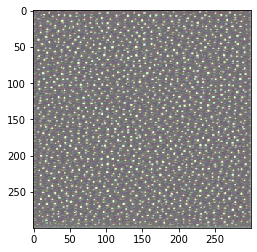

In [51]:
def generate_pattern(layer_name, filter_index, size=300):
    # 주어진 층과 필터의 활성화를 최대화하기 위한 손실 함수
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    # 손실에 대한 입력 이미지의 그래디언트
    grads = K.gradients(loss, model.input)[0]
 
    # 그래디언트 정규화
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])

    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
 
    # 경사 상승법을 40 단계 실행합니다
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    img = input_img_data[0]
    return deprocess_image(img)

plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

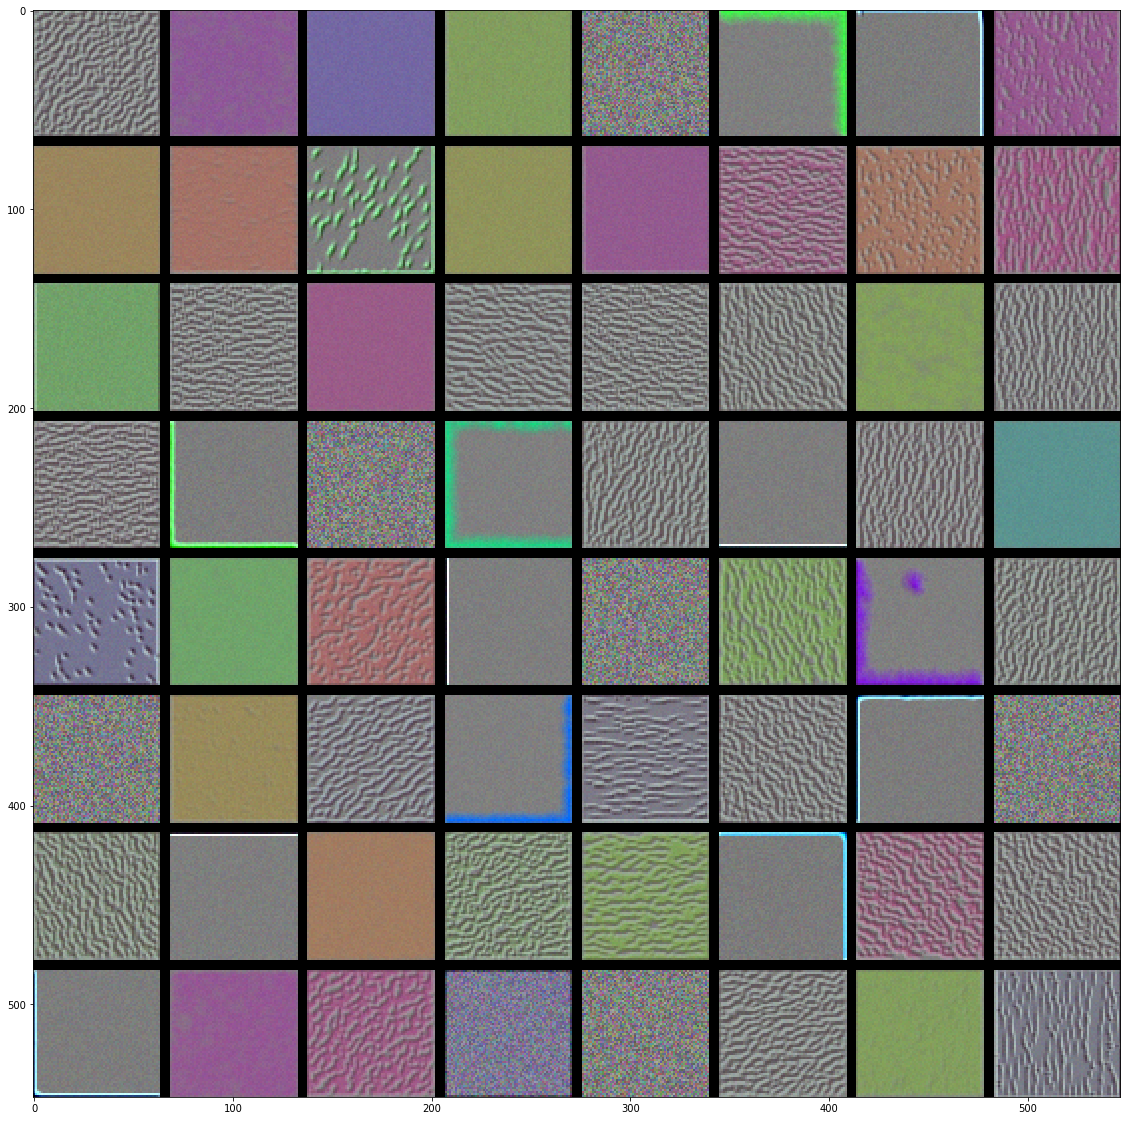

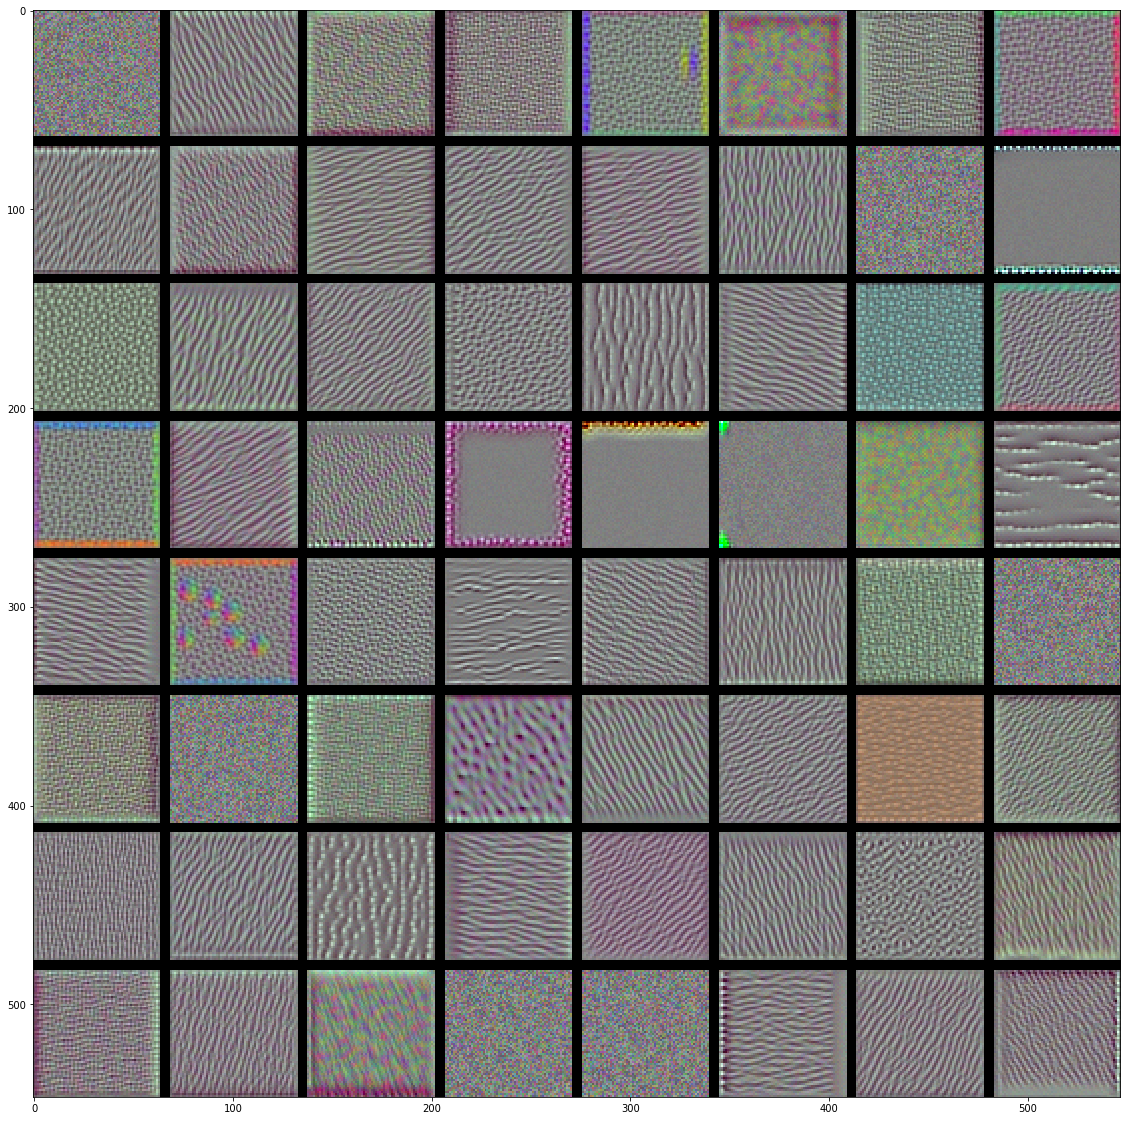

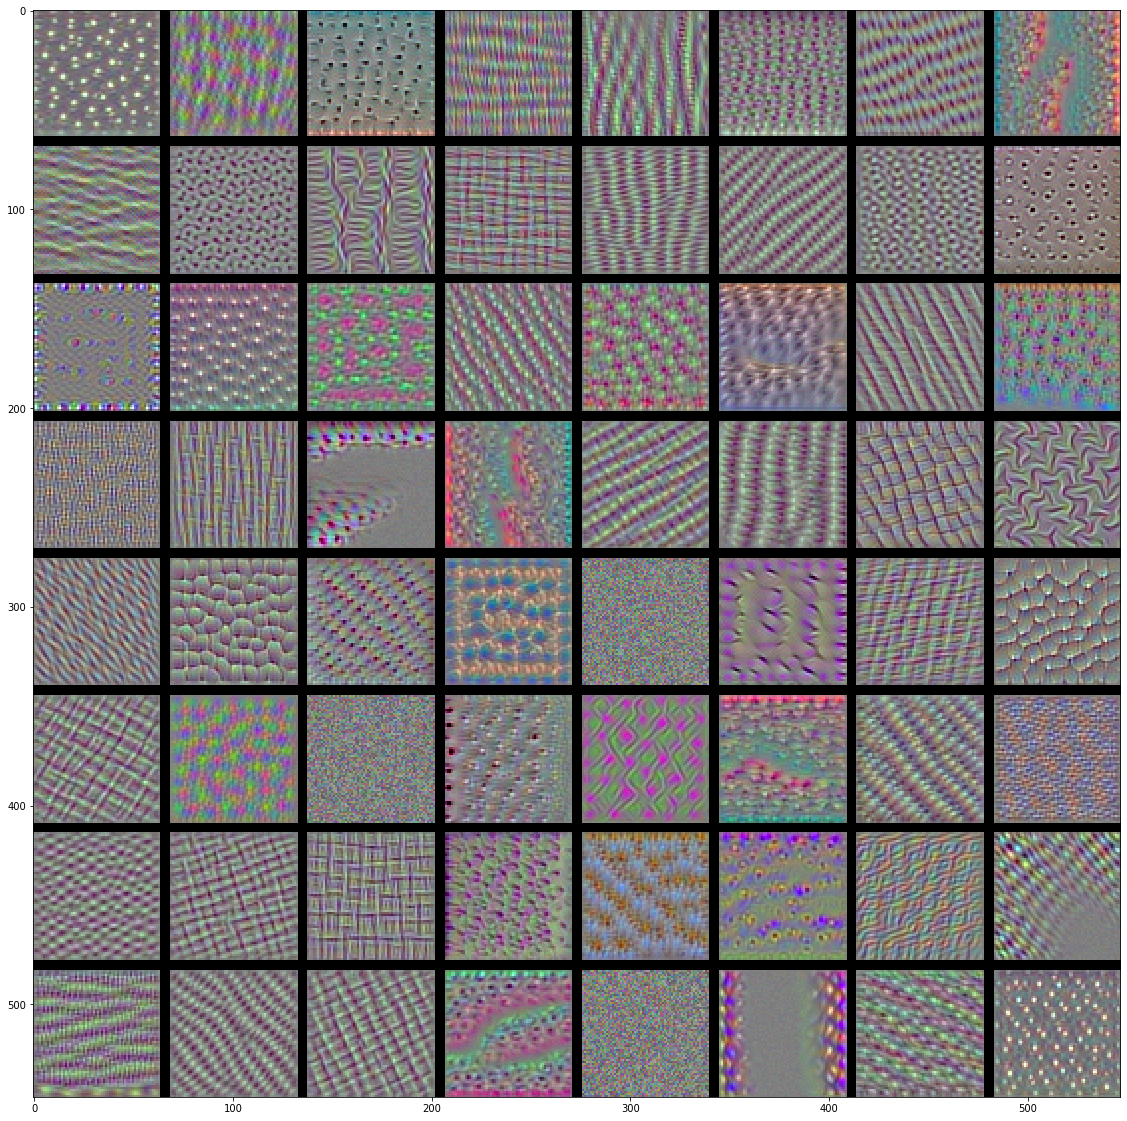

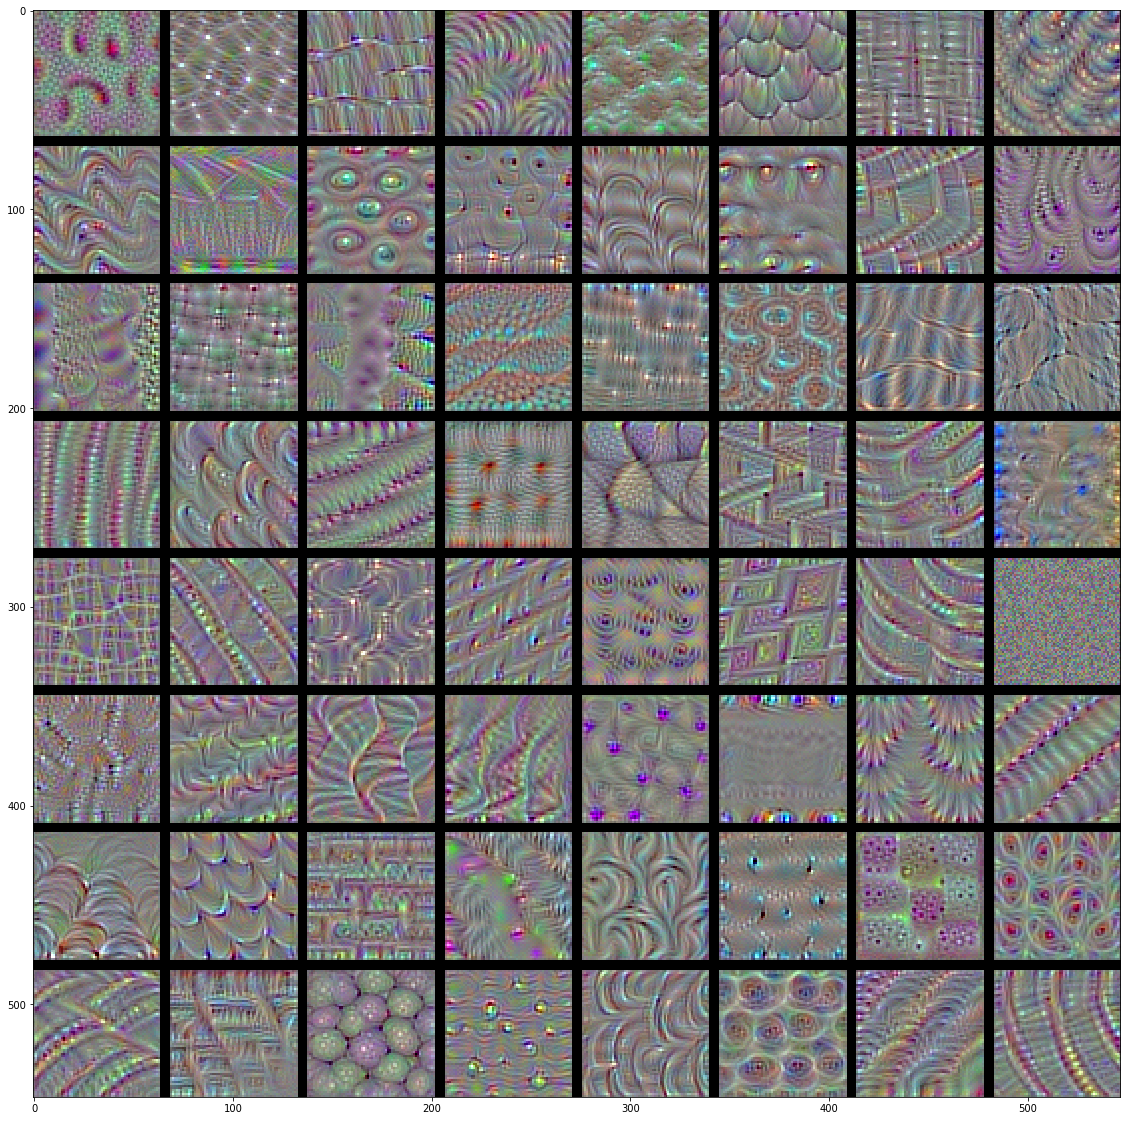

In [53]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5
 
    # 결과를 담을 빈 이미지
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3), dtype='uint8')
    for i in range(8): # results 그리드의 행을 반복
        for j in range(8): # results 그리드의 열을 반복
 
            # layer_name 에 있는 i + (j * 8)번째 필터에 대한 패턴 생성
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
 
            # results 그리드의 (i, j) 번째 위치에 저장
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :]= filter_img

    # results 그리드
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()